In [8]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----------------- ---------------------- 5.0/11.1 MB 59.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 25.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 17.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ------------------- -------------------- 21.0/43.6 MB 102.0 MB/s eta 0:00:01
   ---------------------------------- ----- 37.5/43.6 MB 91.5 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 71.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

In [10]:
hdulist = fits.open('data/allStarLite-dr17-synspec_rev1.fits')

In [11]:
hdu1_data = hdulist[1].data

In [12]:
df4 = pd.DataFrame(hdu1_data.tolist(), columns=hdu1_data.names)

In [13]:
df = df4

In [14]:
df = df.drop_duplicates(subset=['APOGEE_ID'])

In [16]:
df_classes= pd.read_csv("data/classes.csv")

In [17]:
df_classes

,apogee_id,class_spectral,class_lum_logg,class_lum_jhk,class_lum_bins_logg,class_lum_bins_jhk
0,2M00000019-1924498,G,V,Ia,7,3
1,2M00000032+5737103,F,V,II,6,3
2,2M00000032+5737103,F,V,II,6,3
3,2M00000068+5710233,K,IV,II,5,3
4,2M00000103+1525513,G,V,III,6,4
...,...,...,...,...,...,...
594006,2M23595837+5700444,K,III,II,3,5
594007,2M23595846+1503028,G,V,III,7,4
594008,2M23595886+5726058,K,III,II,3,4
594009,2M23595921+5609479,K,III,II,3,4


In [18]:
df

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,VESTA,apo1m,calibration,,NaN,NaN,292.219131,-30.602919,99.999001,0.000,...,0.010266,0,NaN,NaN,0.059403,2,NaN,NaN,NaN,64
1,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597000,0.039,...,0.010609,0,NaN,NaN,0.001221,2,NaN,NaN,NaN,64
2,2M00000019-1924498,apo25m,060-75,none,0.000832,-19.413851,63.394122,-75.906397,11.074000,0.022,...,0.013835,0,NaN,NaN,0.102594,2,NaN,NaN,NaN,64
3,2M00000032+5737103,apo25m,116-04,none,0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
5,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008000,0.045,...,0.053997,0,NaN,NaN,0.276795,2,-0.155160,-0.099500,0.146837,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733896,2M23595886-2009435,apo25m,060-75,none,359.995258,-20.162107,60.806239,-76.324013,11.788000,0.022,...,NaN,0,NaN,NaN,NaN,258,NaN,NaN,NaN,64
733897,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466000,0.024,...,0.011980,0,NaN,NaN,NaN,259,-0.058750,-0.003090,0.072443,0
733898,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985000,0.023,...,0.017686,0,NaN,NaN,NaN,259,-0.103446,-0.047786,0.097572,0
733899,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924000,0.094,...,0.049855,0,NaN,NaN,0.174322,2,0.107710,0.163370,0.140188,0


In [19]:
# Fusionner les DataFrames avec une fusion gauche
df_merged = pd.merge(df_classes, df, left_on='apogee_id', right_on='APOGEE_ID', how='inner')

In [20]:
df_merged

,apogee_id,class_spectral,class_lum_logg,class_lum_jhk,class_lum_bins_logg,class_lum_bins_jhk,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,...,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
0,2M00000019-1924498,G,V,Ia,7,3,2M00000019-1924498,apo25m,060-75,none,...,0.013835,0,NaN,NaN,0.102594,2,NaN,NaN,NaN,64
1,2M00000032+5737103,F,V,II,6,3,2M00000032+5737103,apo25m,116-04,none,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
2,2M00000032+5737103,F,V,II,6,3,2M00000032+5737103,apo25m,116-04,none,...,0.016555,0,NaN,NaN,0.123839,2,NaN,NaN,NaN,64
3,2M00000068+5710233,K,IV,II,5,3,2M00000068+5710233,apo25m,N7789,none,...,0.011601,0,NaN,NaN,0.004401,2,-0.055580,0.000080,0.086572,0
4,2M00000103+1525513,G,V,III,6,4,2M00000103+1525513,apo25m,107-46_MGA,none,...,0.019600,0,NaN,NaN,0.133414,2,NaN,NaN,NaN,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594006,2M23595837+5700444,K,III,II,3,5,2M23595837+5700444,apo25m,N7789,none,...,0.022493,0,NaN,NaN,0.016774,2,-0.035640,0.020020,0.141408,0
594007,2M23595846+1503028,G,V,III,7,4,2M23595846+1503028,apo25m,107-46_MGA,none,...,0.023919,0,NaN,NaN,0.077250,2,NaN,NaN,NaN,64
594008,2M23595886+5726058,K,III,II,3,4,2M23595886+5726058,apo25m,116-04,none,...,0.011980,0,NaN,NaN,NaN,259,-0.058750,-0.003090,0.072443,0
594009,2M23595921+5609479,K,III,II,3,4,2M23595921+5609479,apo25m,NGC7789_MGA,none,...,0.017686,0,NaN,NaN,NaN,259,-0.103446,-0.047786,0.097572,0


In [21]:
df = df_merged

In [22]:
variable_selection = ["J", "H", "K","LOGG", "M_H", "VMICRO", "VMACRO", 'C_FE', 'CI_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 
    'TI_FE', 'V_FE', 'CR_FE', 'MN_FE', 'NI_FE', 'FE_H']

variable_classe =["apogee_id","class_spectral","class_lum_logg","class_lum_jhk","class_lum_bins_logg","class_lum_bins_jhk"]

variable_normalise = ["M_H","VMICRO","VMACRO"]

In [23]:
df = df[variable_normalise]

<function matplotlib.pyplot.show(close=None, block=None)>

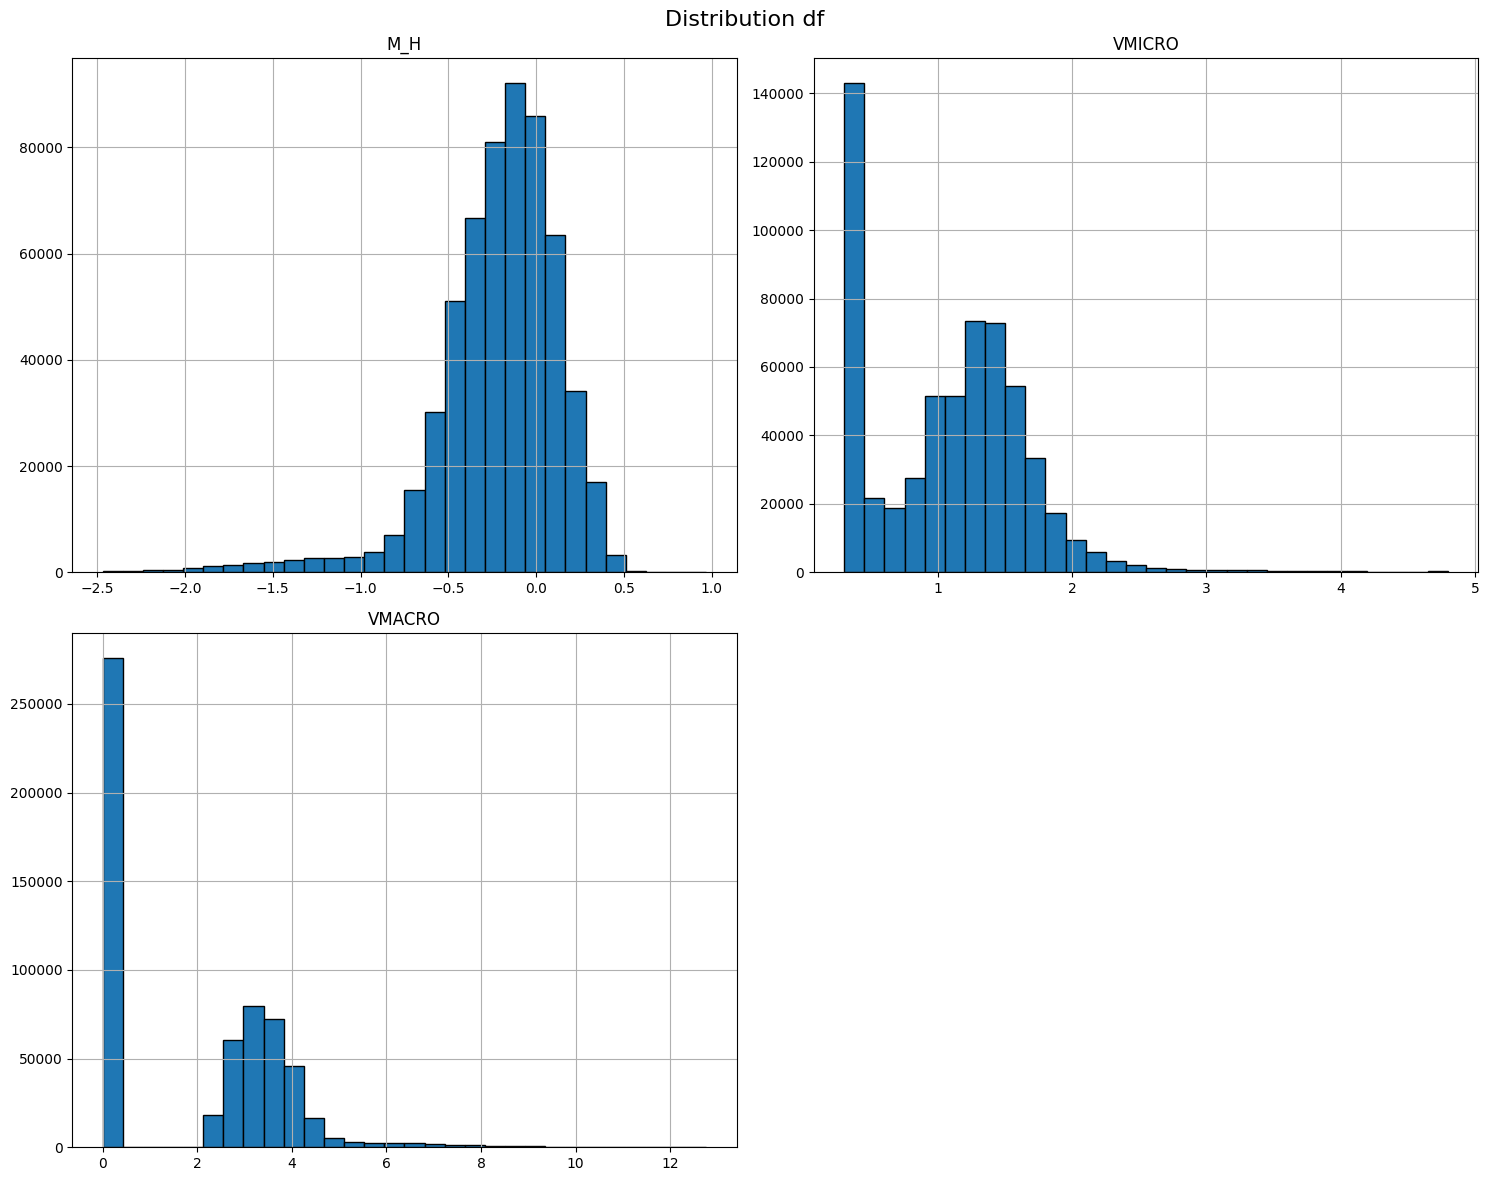

In [24]:
df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df',fontsize=16)
plt.tight_layout()
plt.show

In [28]:
#print("Valeurs abberantes J :",(df["J"] > 30).sum())
#print("Valeurs abberantes H :",(df["H"] > 30).sum())
#print("Valeurs abberantes K :",(df["K"] > 30).sum())
#Drop  les lignes?

In [29]:


# Créer un objet StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation à toutes les colonnes du DataFrame
df_standardized = scaler.fit_transform(df)

# Convertir le résultat en DataFrame pour conserver les noms de colonnes
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

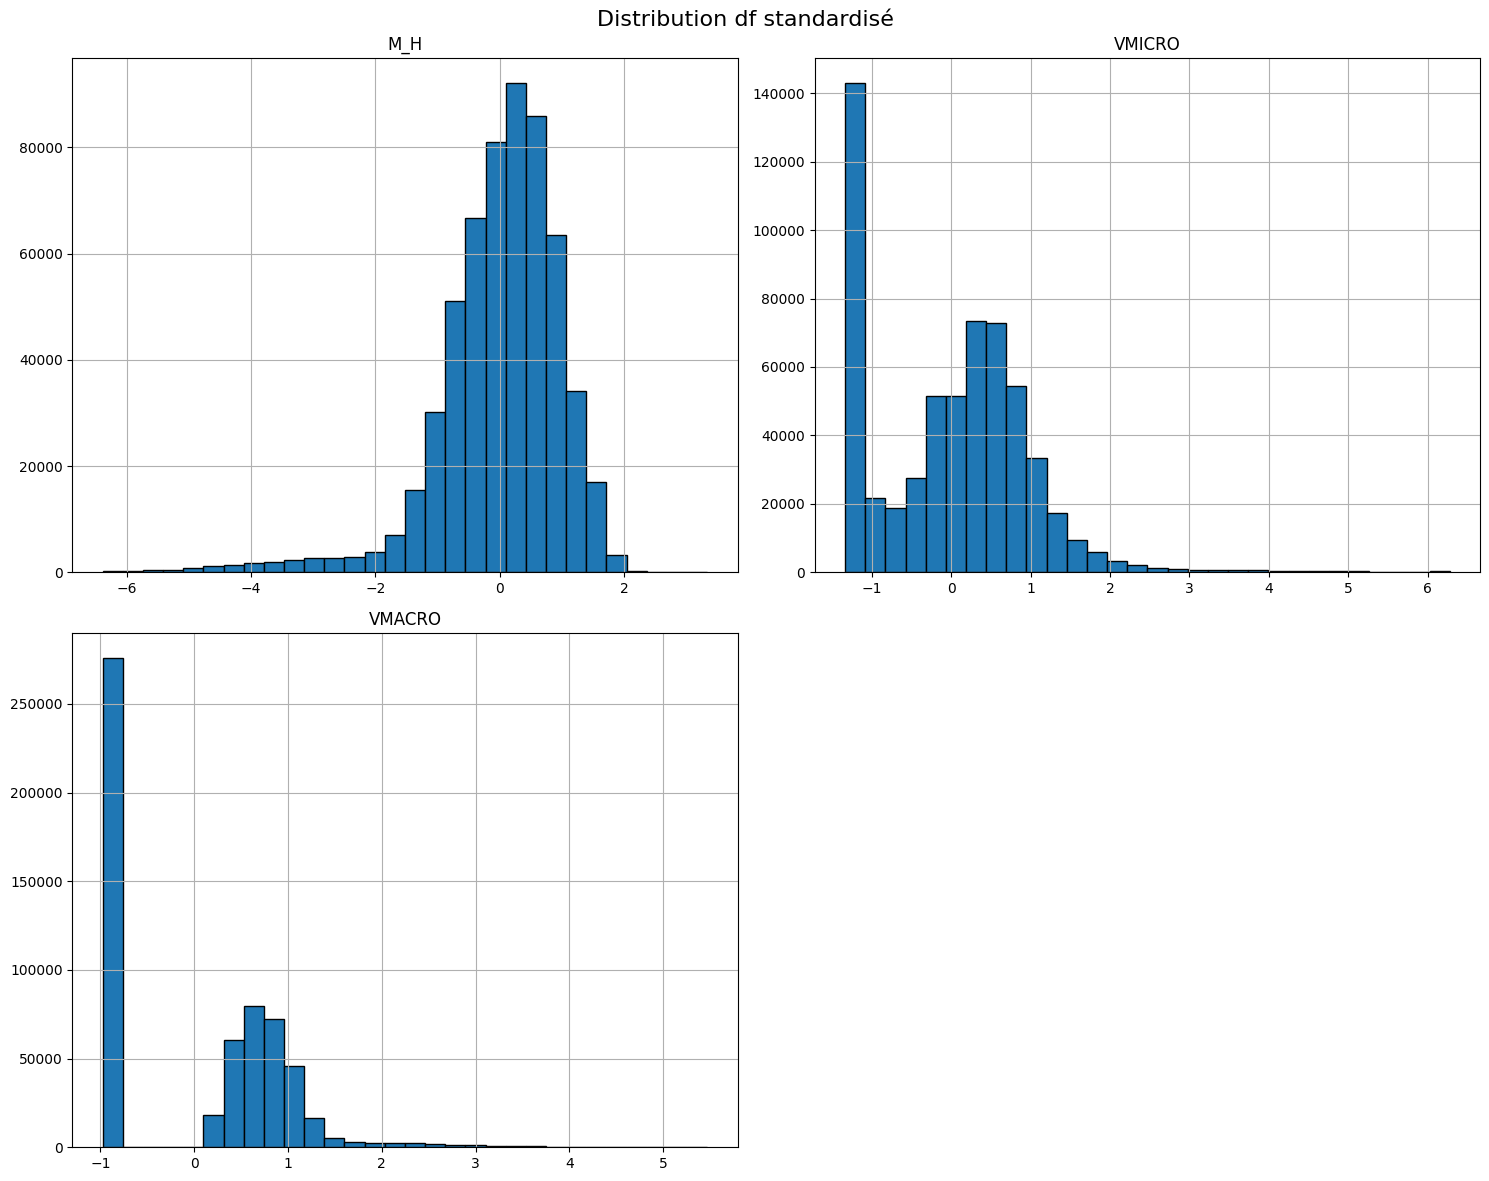

In [30]:
df_standardized.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df standardisé',fontsize=16)
plt.tight_layout()
plt.show

In [31]:
# Créer un objet MinMaxScaler
scaler = MinMaxScaler()

# Appliquer la normalisation Min-Max à toutes les colonnes du DataFrame
df_normalized = scaler.fit_transform(df)

# Convertir le résultat en DataFrame pour conserver les noms de colonnes
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

<function matplotlib.pyplot.show(close=None, block=None)>

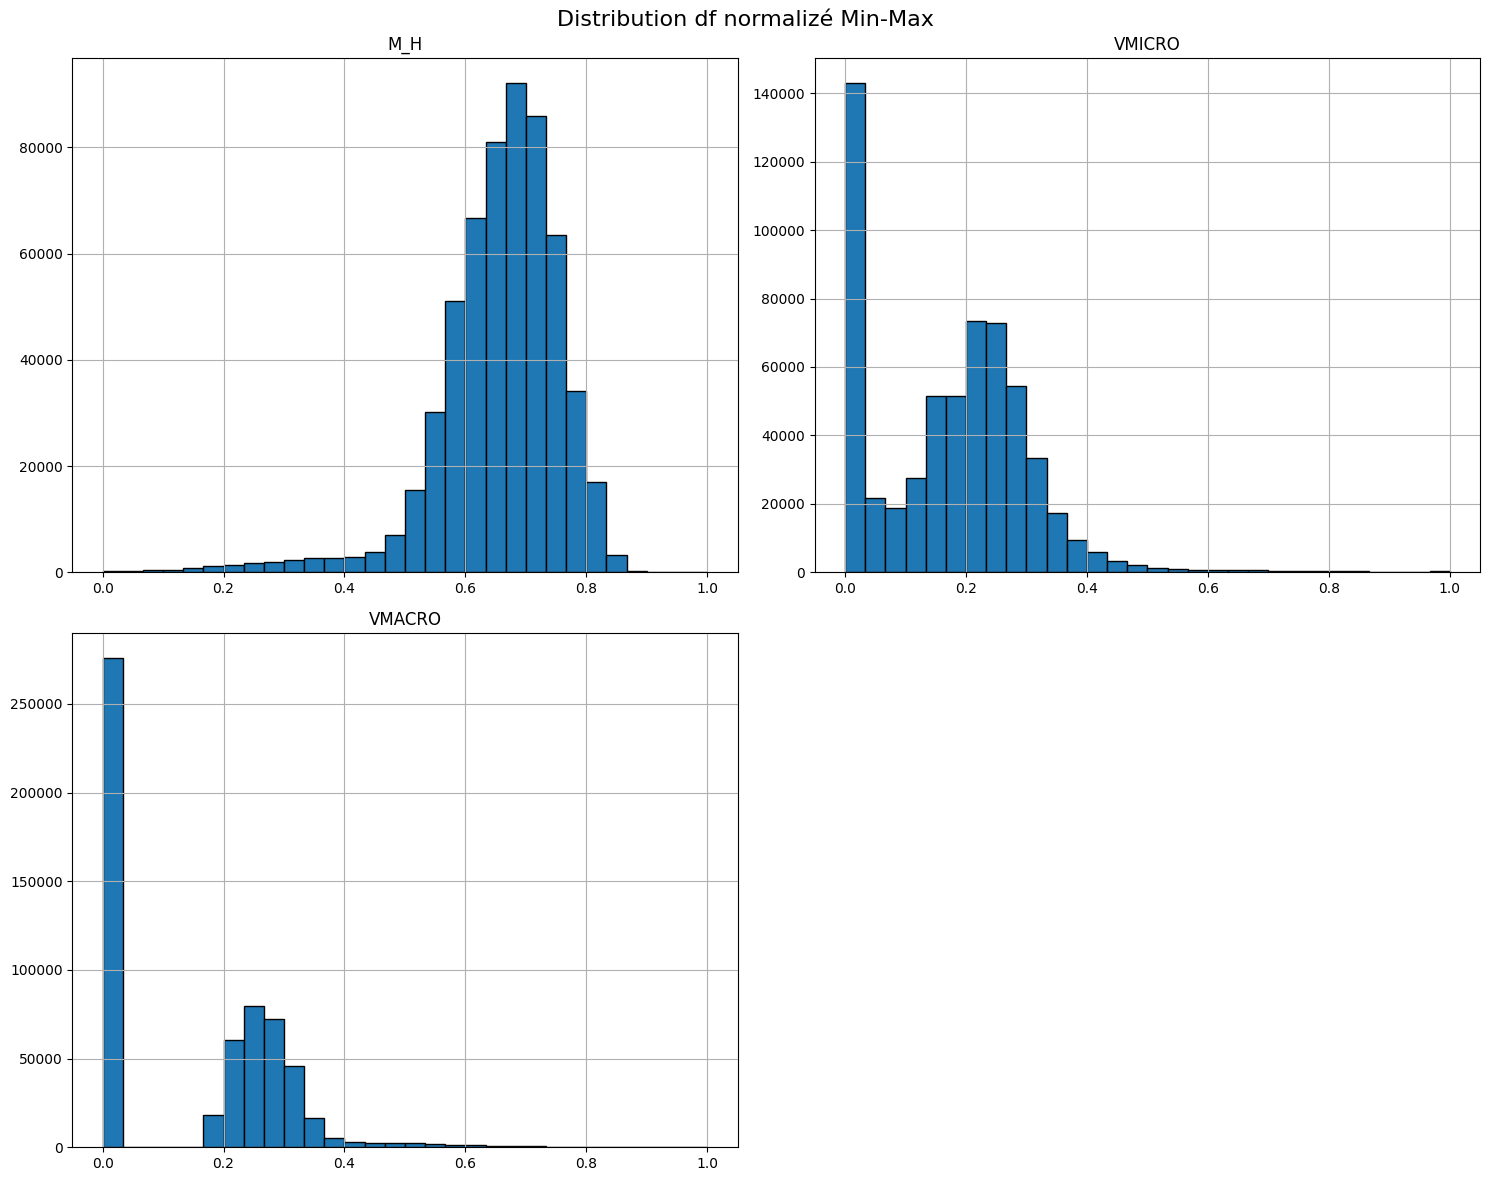

In [32]:
df_normalized.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution df normalizé Min-Max',fontsize=16)
plt.tight_layout()
plt.show

In [33]:
df_standardized.describe()

,M_H,VMICRO,VMACRO
count,5.704300e+05,5.940110e+05,5.940110e+05
mean,-1.661666e-16,-1.517710e-16,-1.224886e-17
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.387543e+00,-1.338218e+00,-9.776324e-01
25%,-4.681201e-01,-1.030323e+00,-9.776324e-01
50%,1.360456e-01,1.070643e-01,3.251789e-01
75%,6.454674e-01,6.371251e-01,7.729363e-01
max,3.337876e+00,6.278540e+00,5.471473e+00


In [34]:
df_normalized.describe()

,M_H,VMICRO,VMACRO
count,570430.000000,594011.000000,594011.000000
mean,0.656788,0.175694,0.151592
std,0.102823,0.131290,0.155060
min,0.000000,0.000000,0.000000
25%,0.608655,0.040423,0.000000
50%,0.670777,0.189750,0.202014
75%,0.723158,0.259342,0.271444
max,1.000000,1.000000,1.000000


In [35]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df.columns:
    stat, p_value = shapiro(df[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

        statistic        p_value  normality
M_H      0.893936  5.217422e-148      False
VMICRO   0.913939  4.931105e-142      False
VMACRO   0.804367  6.309135e-169      False


c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df_standardized.columns:
    stat, p_value = shapiro(df_standardized[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

        statistic        p_value  normality
M_H      0.893936  5.217422e-148      False
VMICRO   0.913939  4.931105e-142      False
VMACRO   0.804367  6.309135e-169      False


c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
# Initialiser un dictionnaire pour stocker les résultats
normality_results = {}

# Parcourir les colonnes numériques du DataFrame
for col in df_normalized.columns:
    stat, p_value = shapiro(df_normalized[col].dropna())  # Tester en ignorant les NaN
    normality_results[col] = {"statistic": stat, "p_value": p_value}

# Convertir les résultats en DataFrame pour les visualiser
results_df = pd.DataFrame(normality_results).T
results_df["normality"] = results_df["p_value"] > 0.05  # True si les données suivent une loi normale

# Afficher les résultats
print(results_df)

        statistic        p_value  normality
M_H      0.893936  5.217422e-148      False
VMICRO   0.913939  4.931105e-142      False
VMACRO   0.804367  6.309135e-169      False


c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 570430.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\axioz\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 594011.
  res = hypotest_fun_out(*samples, **kwds)


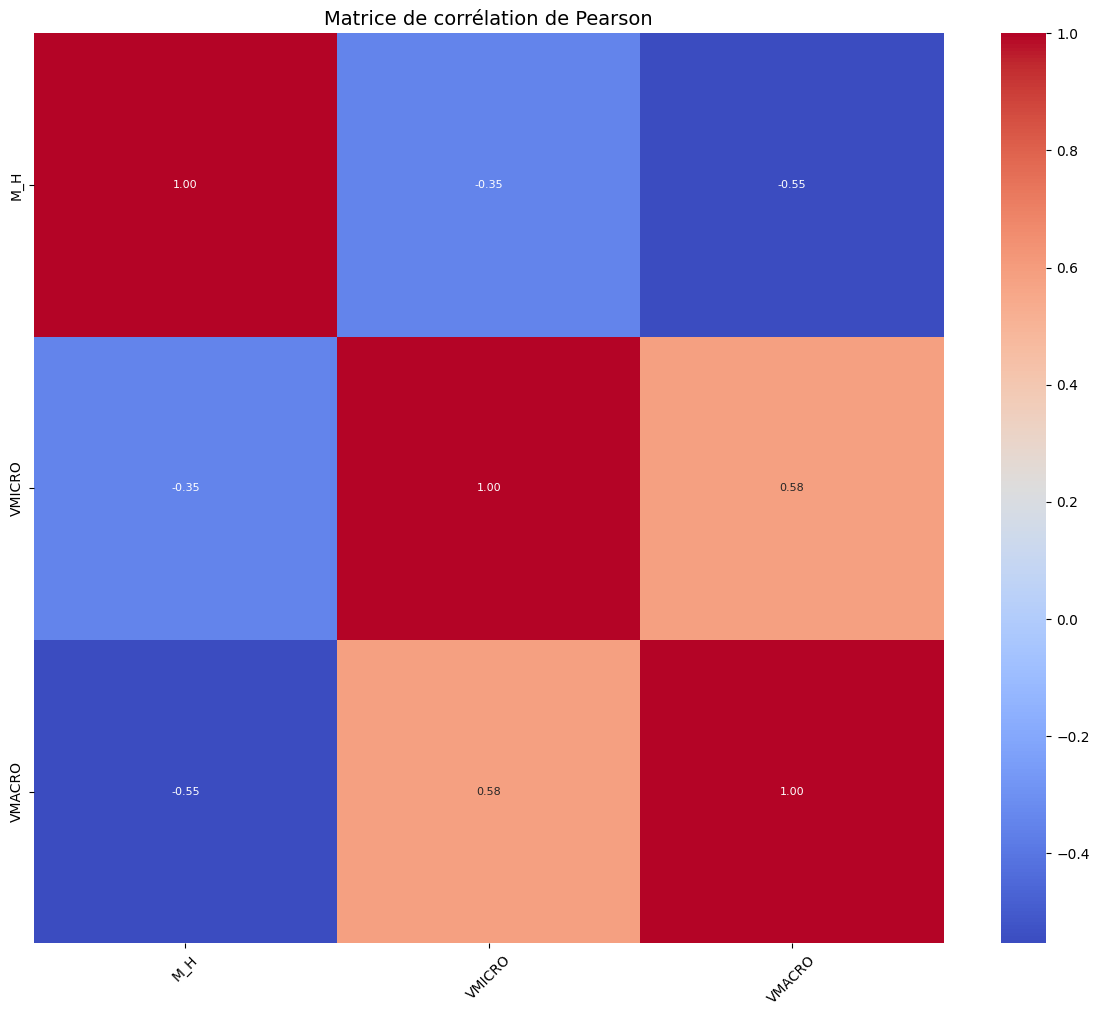

In [38]:

# Calculer la matrice de corrélation de Pearson
correlation_matrix = df.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

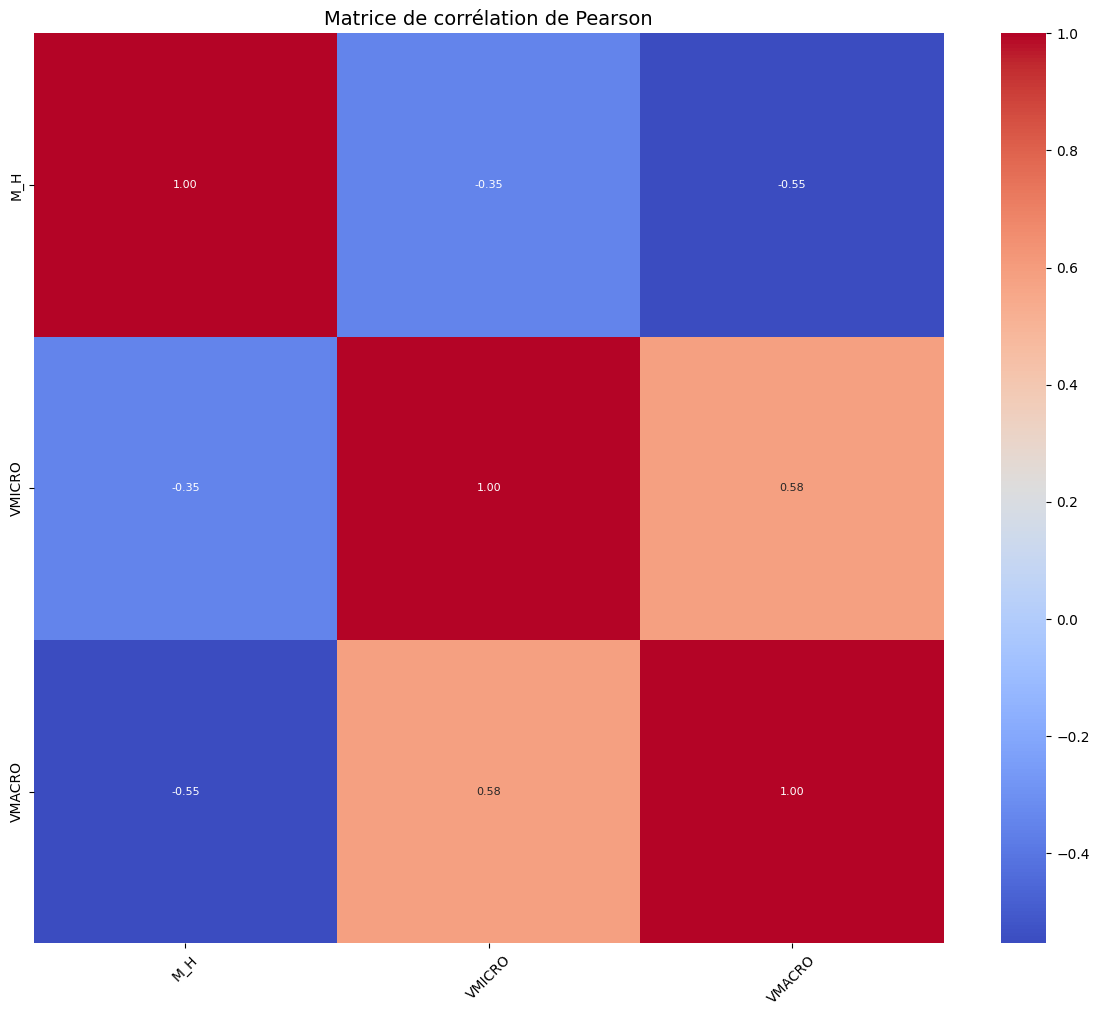

In [39]:
# Calculer la matrice de corrélation de Pearson
correlation_matrix = df_standardized.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

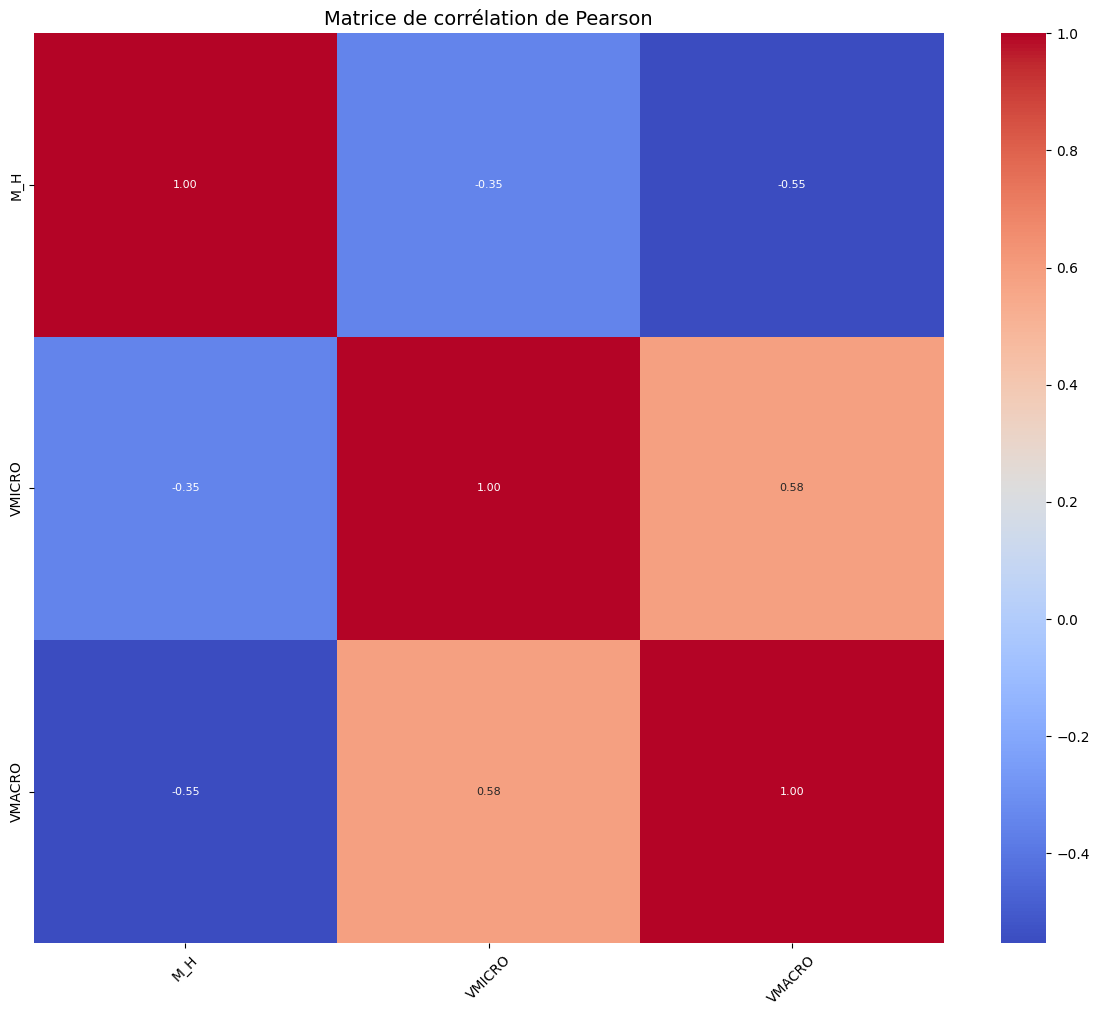

In [40]:
# Calculer la matrice de corrélation de Pearson
correlation_matrix = df_normalized.corr(method='pearson')

# Augmenter la taille de la figure et ajuster les paramètres pour une meilleure lisibilité
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(
    correlation_matrix,
    annot=True,               # Afficher les valeurs numériques
    fmt=".2f",                # Formater les nombres à 2 décimales
    annot_kws={"size": 8},    # Réduire la taille des annotations
    cmap='coolwarm',          # Palette de couleurs
    cbar=True,                # Afficher la barre de couleur
    square=True               # Garder les cellules carrées
)
plt.xticks(rotation=45, fontsize=10)  # Incliner les noms des colonnes pour éviter le chevauchement
plt.yticks(fontsize=10)               # Ajuster la taille des noms des lignes
plt.title("Matrice de corrélation de Pearson", fontsize=14)  # Titre plus lisible
plt.tight_layout()  # Réduire les marges
plt.show()

Normalisation en fonction de la méthode de machine learning : DBSCAN = MinMax / K-means et K-medoids = Standardisation